## Import libraries and dataset

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
# get dataset
loans_df =  pd.read_csv('../../data/data_preprocessed.csv', index_col=0)

In [63]:
#show first 5 lines
loans_df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,dti,total_rec_late_fee,loan_status,mortgage,own,rent
0,15000.0,0.0,6.97,462.96,6.0,5,60000.0,21.84,0.000000,1,1.0,0.0,0.0
1,8000.0,0.0,16.29,282.41,3.0,10,43000.0,24.81,0.000000,1,0.0,1.0,0.0
2,3500.0,1.0,20.50,93.71,2.0,5,34000.0,21.07,14.968877,0,0.0,1.0,0.0
4,24000.0,0.0,14.46,825.64,4.0,10,106404.0,13.54,0.000000,1,1.0,0.0,0.0
5,7200.0,0.0,7.90,225.29,6.0,3,68000.0,7.98,14.979058,0,0.0,0.0,1.0


In [84]:
#subsample for live code
loans_df = loans_df.sample(10000)

# Regression tasks

Remember with regression tasks we want to predict a continous variable. In our example we're going to try to predict `loan_amnt` with our other features.

### Basic example

Let's code through a simple example and see how we can infere our intercept and slope.

In [65]:
#sample 50 observations
loans_df_small = loans_df.sample(50)

#split into X and y
X_small = loans_df_small[['annual_inc']]
y_small = loans_df_small['loan_amnt']

/Users/michieldekoninck/.pyenv/versions/3.8.12/envs/dforb/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


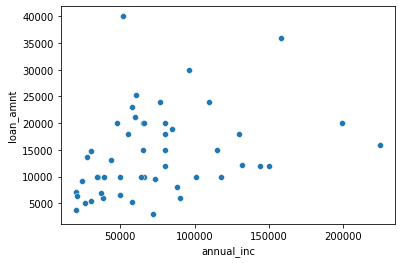

In [66]:
#let's plot our observations as a scatterplot
sns.scatterplot(X_small['annual_inc'], y_small);

In [67]:
from sklearn.linear_model import LinearRegression

# Instantiate the model
lin_reg = LinearRegression()

# Train the model on the training data
lin_reg.fit(X_small, y_small)

LinearRegression()

Now that we have a trained model we can use the `.intercept_` and `.coef_` attributes to get our intercept and slope. Then we can plot our line-of-best-fit on our scatterplot.

In [68]:
intercept = lin_reg.intercept_
slope = lin_reg.coef_

/Users/michieldekoninck/.pyenv/versions/3.8.12/envs/dforb/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


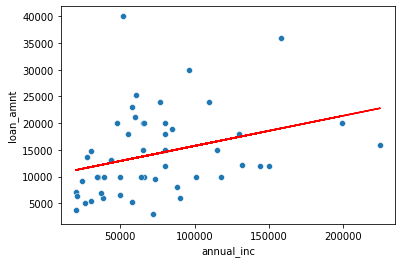

In [69]:
sns.scatterplot(X_small['annual_inc'], y_small)
plt.plot(X_small['annual_inc'], intercept+slope*X_small, c='r');

### Full Example

#### Train test split

Let's split our data so we can see how well our model generalises. Remember with `generalize` we mean the ability of a model to handle unseen data.

In [70]:
#define x & y because we don't wanna scale our target
from sklearn.model_selection import train_test_split

X = loans_df.drop(columns=['loan_amnt'])

y = loans_df.loan_amnt

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Linear regression

Linear regression is one of the most basic models but still one of the go-to models in reality.

In [71]:
from sklearn.linear_model import LinearRegression

# Instantiate the model
lin_reg = LinearRegression()

# Train the model on the training data
lin_reg.fit(X_train, y_train)

LinearRegression()

Now that we have a trained model, meaning our model knows the ideal intercept and slopes for all features, we can score it using the metrics we saw during the lecture.

We will first have to use the `.predict()` to get our predictions for `X` using our trained model

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error

#get our predictions
y_pred = lin_reg.predict(X_test)

#score our model
lin_mse = mean_squared_error(y_test, y_pred, squared=False)
lin_mae = mean_absolute_error(y_test, y_pred)
lin_max_er = max_error(y_test, y_pred)

# print(f"The MSE for our model is {lin_mse}")
# print(f"The MAE for our model is {lin_mae}")
# print(f"The Max error for our model is {lin_max_er}")

#### Decision tree regressor

Let's do the same process using a `decision tree regressor`. We can then use the metrics to see which model performs better in which case.

In [73]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
tree = DecisionTreeRegressor()

# Train the model on the Training data
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [74]:
#get our predictions
y_pred = tree.predict(X_test)

#score our model
tree_mse = mean_squared_error(y_test, y_pred, squared=False)
tree_mae = mean_absolute_error(y_test, y_pred)
tree_max_er = max_error(y_test, y_pred)

# print(f"The MSE for our model is {tree_mse}")
# print(f"The MAE for our model is {tree_mae}")
# print(f"The Max error for our model is {tree_max_er}")

Now let's compare the two models:

In [75]:
print(f"RMSE Linear Regression: {round(lin_mse,2)}, RMSE Decision tree {round(tree_mse,2)}")
print(f"MAE Linear Regression: {round(lin_mae,2)}, MAE Decision tree {round(tree_mae,2)}")
print(f"Max error Linear Regression: {round(lin_max_er,2)}, Max error Decision tree {round(tree_max_er,2)}")

RMSE Linear Regression: 1122.84, RMSE Decision tree 356.29
MAE Linear Regression: 694.53, MAE Decision tree 47.06
Max error Linear Regression: 17319.47, Max error Decision tree 17125.0


We can see that our decision tree model performs better across the board!


## Classification tasks

With classification we're trying to predict a specific class represented by binary values. Let's use an `SVM` and `Decision Tree Classifier` to try to predict `loan_status`. Afterwards we will use the different metrics we learned and see how our models compare to each other.

#### Train test split

In [76]:
#define x & y because we don't wanna scale our target
from sklearn.model_selection import train_test_split

X = loans_df.drop(columns=['loan_status'])

y = loans_df.loan_status

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### SVM

As mentioned in the lecture we can use a `SVM` for classification tasks. Let's fit, train and score a model on our dateset.

We'll use an `RBF kernel` in our SVM model. This is quite high level for now so what you should understand here is that it allows our model to use higher dimensions for the seperation of the data. Using a `linear kernel` here would be difficult since our data will not be linearly seperable.

Please take note that it can take some time to fit :)

In [81]:
from sklearn.svm import SVC

# Instantiate the model => we use an rbf kernel to work in higher dimension as this dataset will not be linearly seperable
svm = SVC(kernel='rbf' , class_weight={0:4,1:1})

# Train the model on the Training data
svm.fit(X_train, y_train)

# Score the model on the Test data
svm.score(X_test,y_test)

0.6384479717813051

Let's take a minute to think about our score here. 

The `.score()` method gives back our `accuracy-score`. So our 63% accuracy is the amount of observations our model was right about. Seems relatively good right?

But let's have a look again at the distribution of our `loan_status` status variable.

In [85]:
# check value counts
y.value_counts()

1    101896
0     24732
Name: loan_status, dtype: int64

In [86]:
# calculate percentage of most dominant class
y.sum() / y.shape[0]

0.804687746785861

So by calculating the percentage `fully paid` on the total y column, we can see that this class consists of about 80% of the total amount of observations. 

This means that if we would have just guessed this category everytime we would have been right about 80% of the time, which is better than our model.

Let's look into our other metrics to see how our model performs there.

In [82]:
# calculate y_pred
y_pred = svm.predict(X_test)

#calculate scores
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(accuracy, recall, precision, f1);

0.6384479717813051 0.6774922986170282 0.8414946879960923 0.7506399665946515


Some increases in performance here but still not great. Let's try another model!

#### Decision tree classifier

In [77]:
from sklearn.tree import DecisionTreeClassifier

#instantiate model
tree_reg = DecisionTreeClassifier()

#fit model to our training data
tree_reg.fit(X_train, y_train)

#we can use the built-in method .score() to get our accuracy score
tree_reg.score(X_test, y_test)

0.7151280633867698

In [80]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# calculate y_pred
y_pred = tree_reg.predict(X_test)

#calculate scores
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(accuracy, recall, precision, f1);

0.7151280633867698 0.8135282165563348 0.8286820670316464 0.8210352240780553


Looking into our other metrics we see that the model performs a lot better than the SVM one. Still not the score we are looking for though. Let's see tomorrow if we can improve with DL.